#### Collecting the data


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
mcd_df=pd.read_csv("mcdonalds.csv")
mcd_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
# Shape
mcd_df.shape
# 1453 Rows and 15 columns

(1453, 15)

In [4]:
# fetching first 11 cols
mcd_x=mcd_df.iloc[:,0:11]
mcd_x


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [5]:
# Convert Yes/No to binary (1/0)

mcd_x_binary=(mcd_x=="Yes").astype(int)
mcd_x_binary

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [6]:
# 3. transformation worked by calculating column means
print("Column Means (segmentation variables:- )")
print(mcd_x_binary.mean().round(2))

Column Means (segmentation variables:- )
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
# 4. Performing pca analysis on the binary segmentation data

pca=PCA()
pca

PCA()

In [8]:
mcd_PCA=pca.fit_transform(mcd_x_binary)
mcd_PCA

array([[-0.42536706,  0.21907878, -0.6632553 , ..., -0.18100693,
        -0.51570617,  0.56707389],
       [ 0.21863768, -0.38818996,  0.73082668, ..., -0.11147641,
        -0.49331285,  0.50044033],
       [-0.37541475, -0.73043507,  0.12203978, ...,  0.32228786,
        -0.06175857, -0.24274108],
       ...,
       [ 0.18589445, -1.06266156, -0.22085675, ..., -0.03825472,
        -0.05651822,  0.01279977],
       [ 1.18206441,  0.03856977, -0.56156066, ..., -0.02226748,
         0.00257265,  0.10531631],
       [-1.55024186, -0.27503101,  0.01373727, ...,  0.13658866,
         0.43279782,  0.45607556]])

In [9]:
# 5. printing the pca explained variance

print("\nPCA explained variance:- ")
explained_variance=pca.explained_variance_ratio_
print(np.round(explained_variance,4))


PCA explained variance:- 
[0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]


In [10]:
# 6. printing the pca component loading

pca_compo=pd.DataFrame(pca.components_,columns=mcd_x_binary.columns)
pca_compo.round(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.48,0.16,0.01,-0.12,-0.30,0.11,0.34,0.47,-0.33,0.21,-0.37
1,-0.36,-0.02,-0.02,0.03,0.06,0.09,0.61,-0.31,-0.60,-0.08,0.14
2,0.30,0.06,0.04,0.32,0.80,0.06,0.15,0.29,-0.02,-0.19,0.09
3,0.06,-0.14,0.20,-0.35,0.25,-0.10,0.12,-0.00,0.07,0.76,0.37
4,0.31,-0.28,-0.07,0.07,-0.36,-0.11,0.13,0.21,0.00,-0.29,0.73
5,-0.17,0.35,0.36,0.41,-0.21,0.59,0.10,0.08,0.26,0.18,0.21
6,-0.28,-0.06,0.71,-0.39,0.04,-0.09,-0.04,0.36,-0.07,-0.35,-0.03
7,-0.01,0.11,-0.38,-0.59,0.14,0.63,-0.14,0.07,-0.03,-0.18,0.17
8,-0.57,0.02,-0.40,0.16,0.00,-0.17,-0.08,0.64,-0.07,0.19,0.07
9,0.11,0.67,0.08,0.01,-0.01,-0.24,-0.43,-0.08,-0.45,0.04,0.29


In [11]:
# 7. Summuary of pca result

pca_summary=pd.DataFrame(
    {
        "Standarad Deviation":np.sqrt(pca.explained_variance_),
        "Proportion of Variance":explained_variance,
        "Cummulative Proportion":np.cumsum(explained_variance)
    }
)
pca_summary.round(4)


,Standarad Deviation,Proportion of Variance,Cummulative Proportion
0,0.7570,0.2994,0.2994
1,0.6075,0.1928,0.4922
2,0.5046,0.1330,0.6253
3,0.3988,0.0831,0.7084
4,0.3374,0.0595,0.7679
5,0.3103,0.0503,0.8182
6,0.2897,0.0438,0.8620
7,0.2751,0.0395,0.9016
8,0.2653,0.0368,0.9383
9,0.2488,0.0324,0.9707


In [12]:
# Standarizing the data
scaler=StandardScaler()
scaler

StandardScaler()

In [13]:
data_scaled=scaler.fit_transform(mcd_x_binary)
data_scaled

array([[-1.11147857,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [-1.11147857,  0.31873518,  3.11188424, ...,  1.339489  ,
         2.00690848, -0.56648839],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882, -0.56648839],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.74655335,
         2.00690848, -0.56648839],
       [-1.11147857,  0.31873518, -0.32134871, ...,  1.339489  ,
        -0.49827882,  1.76526126]])

In [14]:
pca_2=PCA(n_components=2)
principal_components=pca_2.fit_transform(data_scaled)
principal_components

array([[-0.7043341 ,  0.43701594],
       [ 0.46782033, -0.36427698],
       [-0.19198578, -1.71294939],
       ...,
       [ 0.41427514, -1.8104382 ],
       [ 2.80362953, -0.56275909],
       [-3.49910468, -1.06999906]])

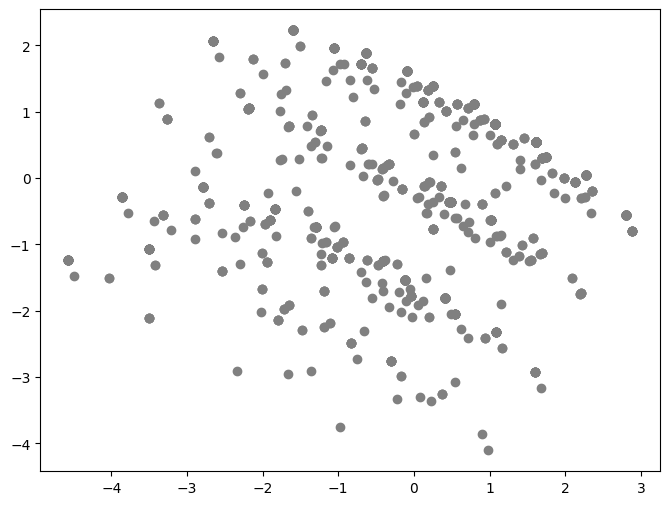

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components[:,0],principal_components[:,1],color="grey" ,label="Consumers")

In [16]:
loadings=pca_2.components_.T*np.sqrt(pca_2.explained_variance_)
loadings

array([[ 0.68256524, -0.36114462],
       [ 0.51798064,  0.05837523],
       [ 0.03911401, -0.08942804],
       [-0.29831681,  0.26271728],
       [-0.44916043,  0.17417384],
       [ 0.35731968,  0.36092191],
       [ 0.48495046,  0.73481495],
       [ 0.71470119, -0.30949782],
       [-0.48798647, -0.7252258 ],
       [ 0.44755488, -0.25689094],
       [-0.68891999,  0.18387052]])

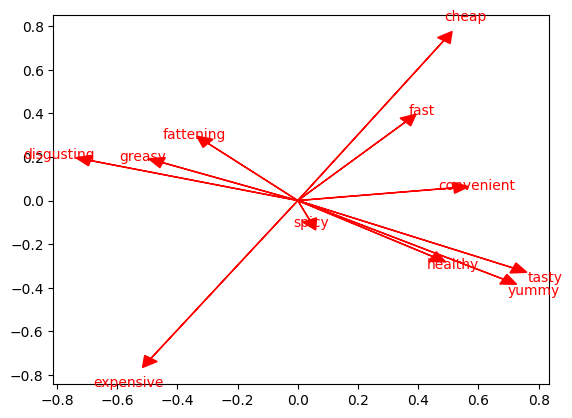

In [17]:
#  add arrows for the variables

for i,variable in enumerate(mcd_x_binary.columns):
    plt.arrow(0,0,loadings[i,0],loadings[i,1],color="r",head_width=0.05,head_length=0.05)
    plt.text(loadings[i,0]*1.15,loadings[i,1]*1.15,variable,color="r",ha='center',va="center")

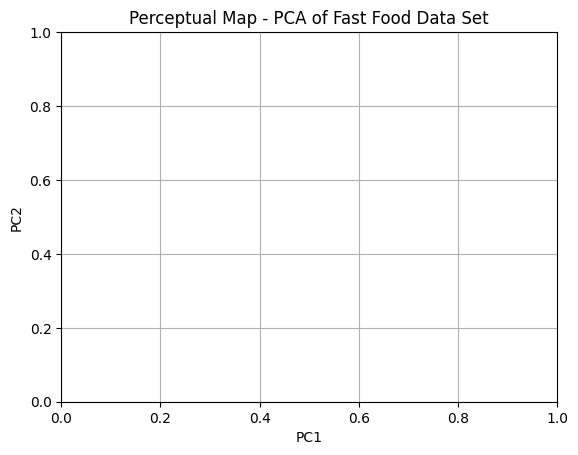

In [18]:
# Adding labels and grid

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0,color="black",lw=0.5)
plt.axvline(0,color="black",lw=0.5)
plt.title("Perceptual Map - PCA of Fast Food Data Set")
plt.grid(True)
plt.show()

In [19]:
# # Step 5: Extracting Segments
# Step 5 is where we extract segments. To illustrate a range of extraction techniques,
# we subdivide this step into three sections. In the first section, we will use standard
# k-means analysis. In the second section, we will use finite mixtures of binary
# distributions. In the third section, we will use finite mixtures of regressions.

In [20]:
inertia=[]
K=range(2,9)

for k in K:
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=1234).fit(mcd_x_binary)
    inertia.append(kmeans.inertia_)

inertia

[2145.503726917159,
 1818.7176591653877,
 1602.9860148663208,
 1435.324785693397,
 1332.1504830614547,
 1249.233890079962,
 1191.5809481928047]

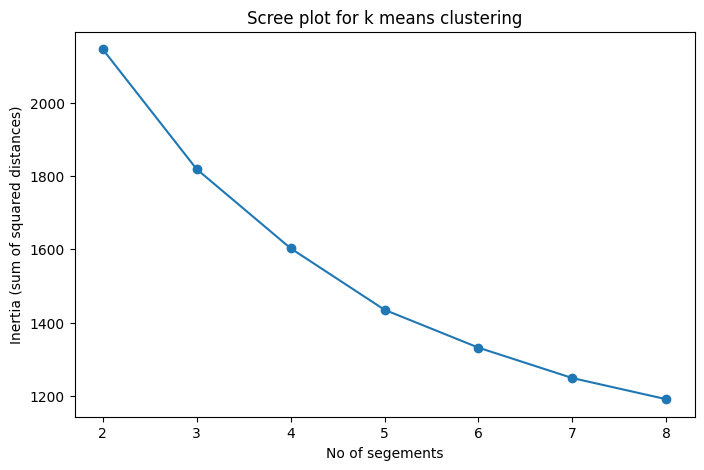

In [21]:
# Plot the scree plt (Elbow  method)

plt.figure(figsize=(8,5))
plt.plot(K,inertia,marker='o')
plt.xlabel("No of segements")
plt.ylabel("Inertia (sum of squared distances)")

plt.title("Scree plot for k means clustering")
plt.show()

In [22]:
# 4. Stability Analysis Using Bootstrap Sampling

def stability_analysis(data,n_clusters_range,n_bootstrap=100,n_init=10):
    stability_score={k: [] for k in n_clusters_range}

    for k in n_clusters_range:
        for i in range(n_bootstrap):
            # Bootstrap sampling 
            data_sample=resample(data,random_state=i)

            # Run k-means on original and resampled data
            kmeans_original=KMeans(n_clusters=k,n_init=n_init,random_state=1234).fit(data)
            kmeans_sampling=KMeans(n_clusters=k,n_init=n_init,random_state=1234).fit(data_sample)

            #  Adjusted Rand Index between original and resampled data
            score=adjusted_rand_score(kmeans_original.labels_,kmeans_sampling.labels_)
            stability_score[k].append(score)
            
    return stability_score

stability_analysis

<function __main__.stability_analysis(data, n_clusters_range, n_bootstrap=100, n_init=10)>

In [23]:
n_cluster_range=range(2,9)
stability_score=stability_analysis(mcd_x_binary,n_cluster_range)

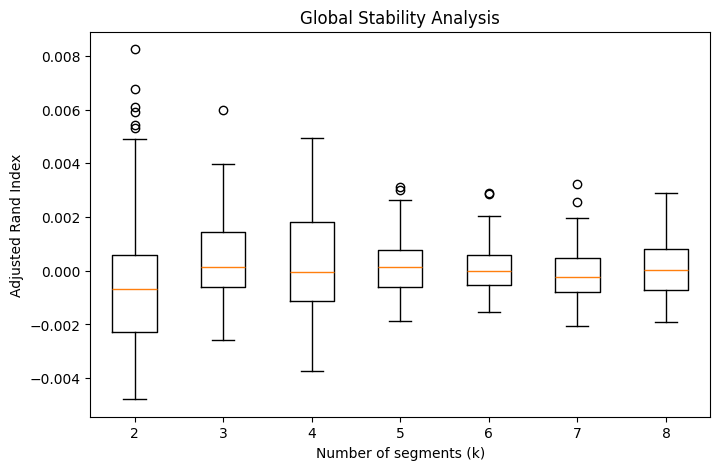

In [25]:
# Plot stability analysis

plt.figure(figsize=(8,5))
plt.boxplot([stability_score[k] for k in n_cluster_range],labels=n_cluster_range)
plt.xlabel('Number of segments (k)')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Analysis')
plt.show()

In [30]:
# k-means for 4 segments
kmeans_4=KMeans(n_clusters=4,n_init=10,random_state=1234).fit(mcd_x_binary)
labels_4=kmeans_4.labels_
labels_4

array([0, 3, 3, ..., 3, 2, 1], dtype=int32)

In [32]:
mcd_k4=labels_4

In [36]:
# George plot(histograph)

df_segments = pd.DataFrame({
    "Segment": mcd_k4
})
df_segments

,Segment
0,0
1,3
2,3
3,2
4,0
...,...
1448,1
1449,2
1450,3
1451,2


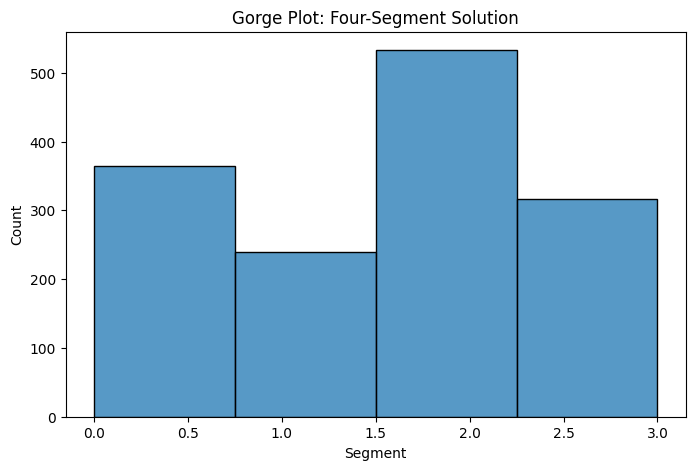

In [41]:
# hostogram

plt.figure(figsize=(8,5))
sns.histplot(df_segments["Segment"],bins=4,kde=False)
plt.title('Gorge Plot: Four-Segment Solution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

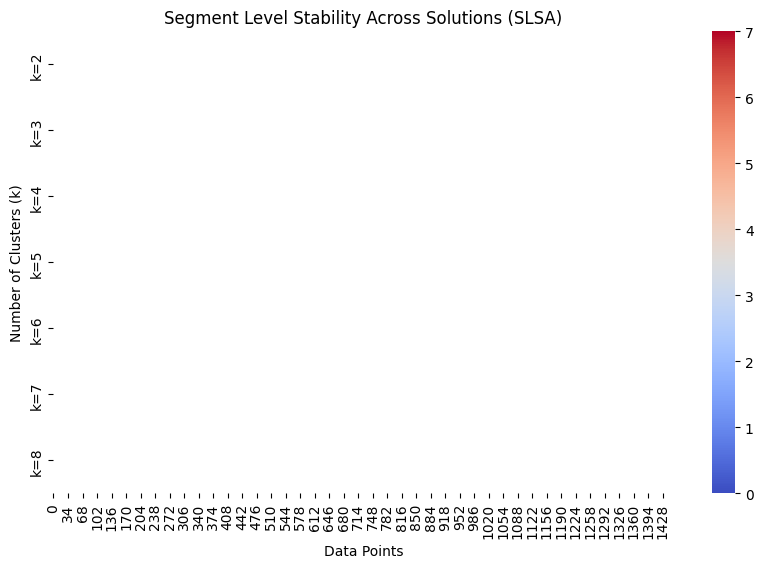

In [45]:
# Level stability

segments_across_k=pd.DataFrame()

for k in range(2,9):
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=1234).fit(mcd_x_binary)
    segments_across_k[f'k={k}']=kmeans.labels_

plt.figure(figsize=(10, 6))
sns.heatmap(segments_across_k.T, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Segment Level Stability Across Solutions (SLSA)')
plt.xlabel('Data Points')
plt.ylabel('Number of Clusters (k)')
plt.show()

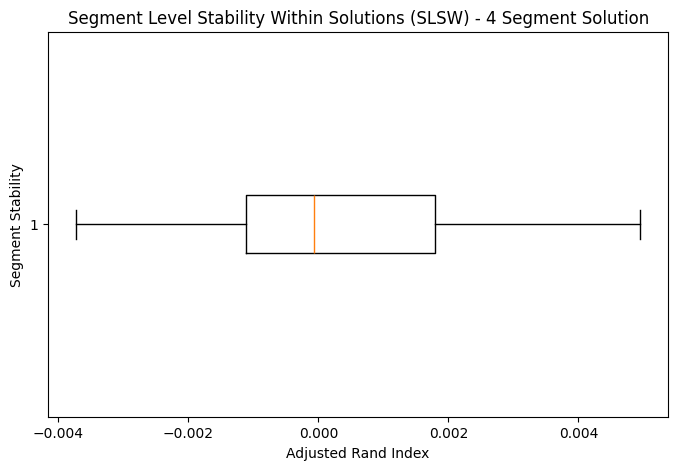

In [46]:
def segment_stability_within(data, n_clusters, n_bootstrap=100, n_init=10):
    segment_stability = []

    kmeans_original = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234).fit(data)

    for i in range(n_bootstrap):
        data_resample = resample(data, random_state=i)
        
        
        kmeans_resample = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234).fit(data_resample)
        
        
        ari = adjusted_rand_score(kmeans_original.labels_, kmeans_resample.labels_)
        segment_stability.append(ari)
    
    return segment_stability


stability_4 = segment_stability_within(mcd_x_binary, n_clusters=4)

plt.figure(figsize=(8, 5))
plt.boxplot(stability_4, vert=False)
plt.title('Segment Level Stability Within Solutions (SLSW) - 4 Segment Solution')
plt.xlabel('Adjusted Rand Index')
plt.ylabel('Segment Stability')
plt.show()

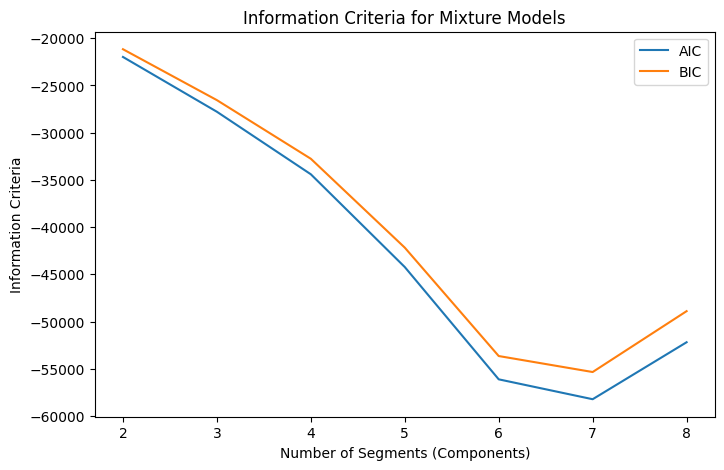

col_0    0    1    2    3
row_0                    
0      148    0  403   29
1        4  203    0   21
2       26   63  227    6
3        0    2    0  321


In [57]:
from sklearn.mixture import GaussianMixture

def fit_mixture_model(data, n_components, n_init=10):
    # Fit Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, n_init=n_init, random_state=1234).fit(data)
    return gmm

# Fit mixture models for 2 to 8 segments
mixture_models = {}
for k in range(2, 9):
    mixture_models[k] = fit_mixture_model(mcd_x_binary, n_components=k)

# Extract AIC, BIC, and log-likelihood for each mixture model
aic_values = [mixture_models[k].aic(mcd_x_binary) for k in range(2, 9)]
bic_values = [mixture_models[k].bic(mcd_x_binary) for k in range(2, 9)]
log_likelihoods = [mixture_models[k].score(mcd_x_binary) for k in range(2, 9)]

# Plot the information criteria (AIC, BIC, log-likelihood)
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), aic_values, label='AIC')
plt.plot(range(2, 9), bic_values, label='BIC')
plt.title('Information Criteria for Mixture Models')
plt.xlabel('Number of Segments (Components)')
plt.ylabel('Information Criteria')
plt.legend()
plt.show()

# Cross-tabulation of k-means and mixture model clusters
kmeans_4 = KMeans(n_clusters=4, random_state=1234).fit(mcd_x_binary)
mixture_4 = mixture_models[4].predict(mcd_x_binary)

from pandas import crosstab
print(crosstab(kmeans_4.labels_, mixture_4))

SyntaxError: invalid syntax (2022332482.py, line 1)